# Assignment 4

### 黄士诚

### 3160103847

### 序号：1

$$ \lim\limits_{n\to \infty}\; corr[\hat{\lambda}_n,V[\hat{\lambda}_n]] = \begin{cases}
     1 & 若0\leq \lambda < \frac{1}{2}\\ 
     0 &  若\lambda = \frac{1}{2}\\ 
     -1 & 若\frac{1}{2} < \lambda \leq 1.
    \end{cases} 
$$

上面的结果会导致什么后果？解释为何标准误差$\sqrt{V[\hat{\lambda}_n]} $不是一个好的误差估计，并用程序验证你的结论

答：一个好的估计值并不应该和参数有太多关系，这个$\hat{\lambda}_n 与V[\hat{\lambda}_n]$之间却是有强相关的关系。也就是说n趋于正无穷的时候，这个估计值和$\hat{\lambda}_n$在部分区域有接近正相关或者负相关的关系，这是不好的。

1) import settings

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

2) define functions   

In [7]:
def xbar(x):
    # 样本均值
    return np.sum(x)/len(x)
def s2(x):
    # 样本方差
    xb=xbar(x)
    return np.linalg.norm(x-np.full(len(x),xb),2)**2/(len(x)-1)
def square_circle(pro,times):
    inside = 0
    dots = np.random.rand(2, times)
    for i in range(times):
        x = dots[0, i] - 0.5
        y = dots[1, i] - 0.5
        if np.abs(x) < np.sqrt(pro)/2 and np.abs(y) < np.sqrt(pro)/2 :
            inside += 1
    #这里为了方便取了误差的平方，所以后面就不用取根号了
    error = np.abs((inside / times)-pro)**2
    return inside / times, error

3) set n = 100000

In [3]:
n = 100000
print(n)


100000


4) 对 n = 100000 的情况画一个图，图的下标是$\lambda$也就是投进概率，  
  三条线分别是 样本误差($\lambda-\hat{\lambda}_n$)、总体方差的无偏估计($V[\hat{\lambda}_n])$、总体方差($Var[\hat{\lambda}_n])$ 。  
  这后面两条线都可以用来估计MC方法的方差，因为MC方法是无偏的，也就是可以估计MC方法的误差

取lambda = 0.499的情况看一下,即使n趋于正无穷，误差依然很大
lam_v-estimation = 0.0000025000
true-variance = 0.0000025000


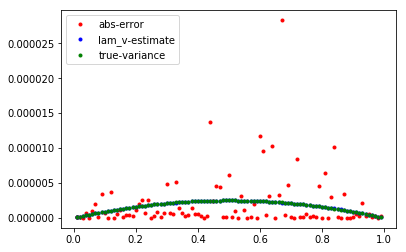

In [6]:
pro = 0.499
# 遍历lambda 作图
for i in np.arange(0.01, 1, 0.01):
    # sn=s/n  su=sum
    sn, su = square_circle(i ,n)
    lis = []
    if i == 0.01:
        plt.plot(i, su, 'r.', label=r'abs-error')
        plt.plot(i, sn*(1-sn)/(n-1), 'b.',label=r"lam_v-estimate")
        plt.plot(i, i*(1-i)/n, 'g.',label=r"true-variance")
    plt.plot(i, su, 'r.')
    plt.plot(i, sn*(1-sn)/(n-1), 'b.')
    plt.plot(i, i*(1-i)/n, 'g.')
             
plt.legend()
plt.savefig("variation.pdf")

# 对lambda = 0.499的情况取一个值看一下
sn, su = square_circle(pro, n)
print('取lambda = 0.499的情况看一下,即使n趋于正无穷，误差依然很大')
print("lam_v-estimation = %.10f"%(sn*(1-sn)/(n-1)))
print("true-variance = %.10f"%(pro*(1-pro)/n))

5)  
蓝色的线是要评测的估计方法，绿色的线是真实的方差，蓝色的线是为了估测绿色的线的，绿色是为了估计红色的。  
从这个图来看，蓝色绿色基本重合，他们都会随$\lambda$变化而变化，而真实的误差是随机的。  
结论： 这意味着估计的误差会随着$\lambda$的增大而增大或者减小，这个估计并不好。因为一般来讲，误差应该和$\lambda$没关系的。而且有一个问题是即使是方差也是和$\lambda$有关的，也不能反映真实的误差情况。所以这个误差估计并不给力。  
原因： 因为这个估计值除了和n有关，和$\lambda$也有关


6)以下为了证明相关性，分别画出在$\lambda$在三个区域的时候,$\hat{\lambda}_n,V[\hat{\lambda}_n]$的散点图

In [24]:
# 随机投点+返回标准差
def MC_circle(times,s):
    inside = 0
    dots = np.random.rand(2, times)
    for i in range(times):
        x = dots[0, i] - 0.5
        y = dots[1, i] - 0.5
        if x * x + y * y <= (s / np.pi):
            inside += 1
    std = np.sqrt((inside / times)*(1 - inside /times)/(times - 1))
    return inside / times, std

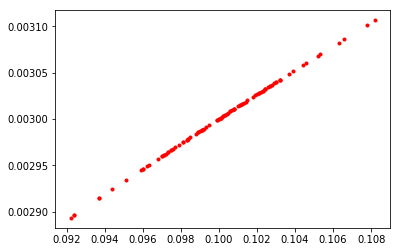

In [19]:
for i in range(100):
    a1,a2 = MC_circle(n,0.1)
    plt.plot(a1,a2,'r.')

在$\lambda$ < 1/2时候呈现正相关

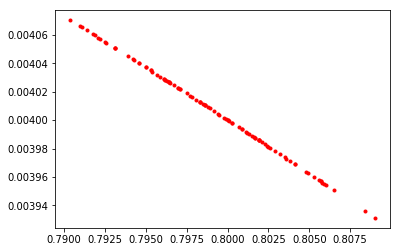

In [20]:
for i in range(100):
    a1,a2 = MC_circle(n,0.8)
    plt.plot(a1,a2,'r.')

在$\lambda$ > 1/2时候呈现负相关

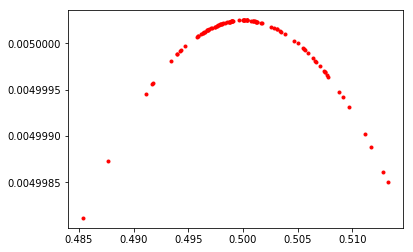

In [25]:
for i in range(100):
    a1,a2 = MC_circle(n,0.5)
    plt.plot(a1,a2,'r.')

在$\lambda$ =  1/2时候呈现非正\负相关，也就是相关系数为0的情形